# ----------------Capstone Project Phase 4 (Unsupervised ML)----------------

# BY: Aakash bindal.

# Batch Number:DS2401.

# Unsupervised ML (Clustering)

Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.

Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.

4.1  "Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"

4.2  Create DataFrame for each cluster that shows data according to the areas.

4.3  "Analyze your clusters and prepare a report that explains all your observations.

Example - 

1. What is impacting more crimes in sensitive areas. 

2. What needs to be done to reduce crime. 

3. Most safe and unsafe districts.

4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

4.4   Capstone project overall story in your own words. Min 1000 words.

# ----------------------4.1  "Create 3 clusters as below-----------------------
1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [21]:
df=pd.read_csv(r"https://raw.githubusercontent.com/aakash0101/Capstone-project/main/india_crime_files/42_District_wise_crimes_committed_against_women_2001_2012.csv")
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   Year                                                 9017 non-null   int64 
 3   Rape                                                 9017 non-null   int64 
 4   Kidnapping and Abduction                             9017 non-null   int64 
 5   Dowry Deaths                                         9017 non-null   int64 
 6   Assault on women with intent to outrage her modesty  9017 non-null   int64 
 7   Insult to modesty of Women                           9017 non-null   int64 
 8   Cruelty by Husband or his Relatives                  9017 non-null   int64 
 9

In [23]:
df.isna().sum()

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

there is no null values present in the dataset

# convert categorical data into numerical data

In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [25]:
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# perform clustering

In [26]:
# Select features for clustering
features = df[['STATE/UT','Rape']]  # replace with your feature columns

In [27]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)  # replace 3 with the number of clusters you want
kmeans.fit(scaled_features)

/Users/aakashbindal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [30]:
# Predict clusters
df['cluster'] = kmeans.predict(scaled_features)

In [31]:
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,cluster
0,1,3,2001,50,30,16,149,34,175,0,1
1,1,28,2001,23,30,7,118,24,154,0,1
2,1,154,2001,27,34,14,112,83,186,0,1
3,1,172,2001,20,20,17,126,38,57,0,1
4,1,220,2001,23,26,12,109,58,247,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9012,18,453,2012,0,0,0,1,0,1,0,0
9013,18,753,2012,0,0,0,1,0,1,0,0
9014,26,382,2012,6,2,0,2,0,1,0,0
9015,26,589,2012,7,14,0,7,2,5,0,0


In [32]:
kmeans.cluster_centers_

array([[ 0.79239085, -0.1014056 ],
       [-0.91745709, -0.10589115],
       [-0.17330061,  7.24344813]])

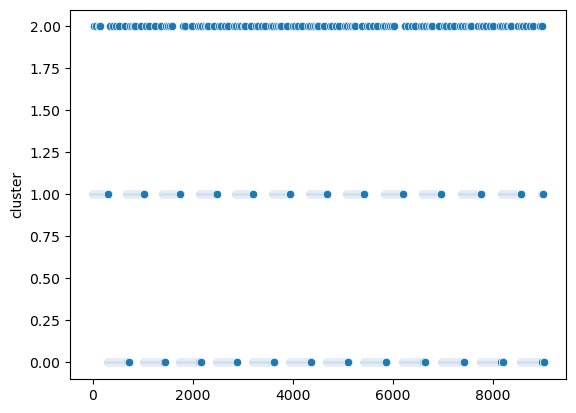

In [33]:
import seaborn as sns
sns.scatterplot(df['cluster'])
plt.show()

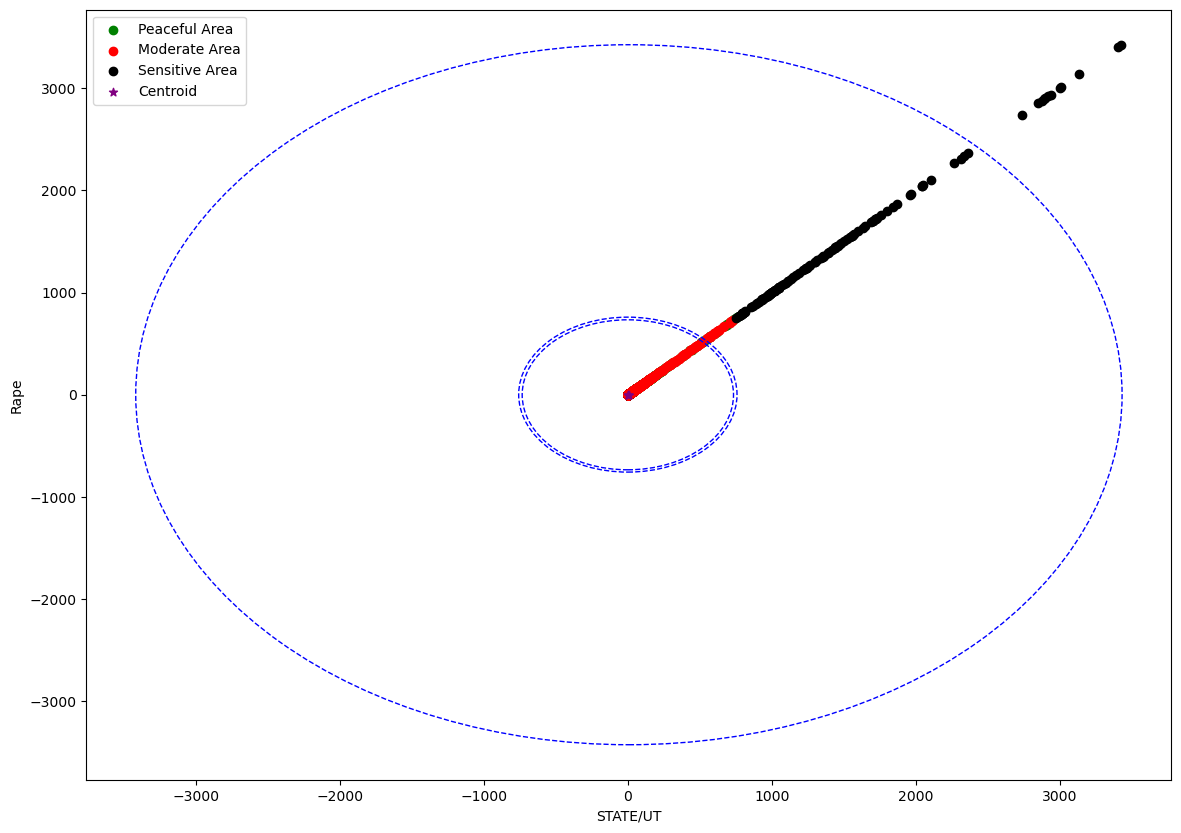

In [36]:
# Separate data into different DataFrames based on clusters
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

# Step 5: Visualize the results
plt.figure(figsize=(14, 10))

# Plot each cluster with different colors and names
plt.scatter(df1['Rape'], df1['Rape'], color='green', label='Peaceful Area')
plt.scatter(df2['Rape'], df2['Rape'], color='red', label='Moderate Area')
plt.scatter(df3['Rape'], df3['Rape'], color='black', label='Sensitive Area')

# Plot cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], color='purple', marker='*', label='Centroid')

# Optional: Draw circles around clusters
for i in range(3):
    center_x, center_y = kmeans.cluster_centers_[i, 1], kmeans.cluster_centers_[i, 0]
    cluster_data = df[df['cluster'] == i]
    radius = max(
        max(cluster_data['Rape']) - center_y,
        center_y - min(cluster_data['Rape']),
        max(cluster_data['STATE/UT']) - center_x,
        center_x - min(cluster_data['STATE/UT'])
    )
    circle = plt.Circle((center_x, center_y), radius, color='blue', fill=False, linestyle='--')
    plt.gca().add_patch(circle)

plt.xlabel('STATE/UT')
plt.ylabel('Rape')
plt.legend()
plt.show()

/Users/aakashbindal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


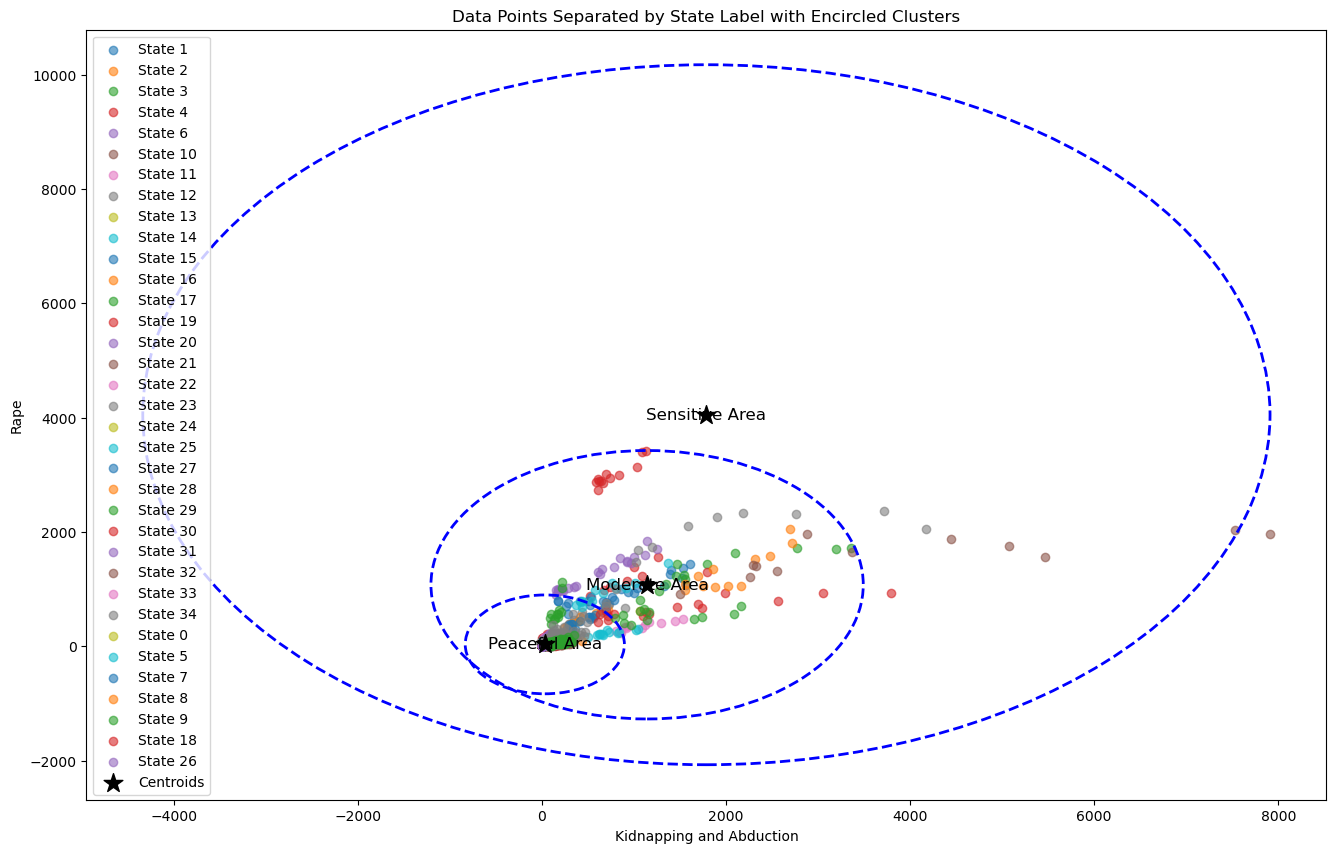

In [38]:
# Apply KMeans clustering
km = KMeans(n_clusters=3, random_state=42)
km.fit(df[['Rape', 'Kidnapping and Abduction']])
df['cluster'] = km.labels_

# Encode 'STATE/UT' as a numerical value
label_encoder = LabelEncoder()
df['STATE/UT_encoded'] = label_encoder.fit_transform(df['STATE/UT'])

# Plot clusters and centroids
plt.figure(figsize=(16, 10))

# Plot data points for each state
for state_label in df['STATE/UT_encoded'].unique():
    df_state = df[df['STATE/UT_encoded'] == state_label]
    plt.scatter(df_state['Kidnapping and Abduction'], df_state['Rape'], label=f'State {state_label}', alpha=0.6)

# Plot centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', s=200, label='Centroids')

# Determine cluster names based on size and plot them
cluster_sizes = [sum(df['cluster'] == i) for i in range(3)]
cluster_names = ['Peaceful Area', 'Moderate Area', 'Sensitive Area']

for i, (center_x, center_y) in enumerate(km.cluster_centers_):
    plt.text(center_x, center_y, cluster_names[i], fontsize=12, ha='center', va='center')

# Draw circles around each cluster
for i in range(3):
    df_cluster = df[df['cluster'] == i]
    center_x = km.cluster_centers_[i, 0]
    center_y = km.cluster_centers_[i, 1]

    radius = max(
        df_cluster['Kidnapping and Abduction'].max() - center_x,
        center_x - df_cluster['Kidnapping and Abduction'].min(),
        df_cluster['Rape'].max() - center_y,
        center_y - df_cluster['Rape'].min()
    )

    circle = plt.Circle((center_x, center_y), radius, color='blue', fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle)

# Set labels and title
plt.xlabel('Kidnapping and Abduction')
plt.ylabel('Rape')
plt.title('Data Points Separated by State Label with Encircled Clusters')
plt.legend()
plt.show()

# ----------------------------------------------------------------------------------------- 4.2  Create DataFrame for each cluster that shows data according to the areas------------------------------------------------------------------------------

In [39]:
df_peaceful_area = df[df['cluster'] == 0]
df_sensitive_area = df[df['cluster'] == 2]
df_moderate_area = df[df['cluster'] == 1]

# "Peaceful Area Data"

In [40]:
df_peaceful_area.head(60)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,cluster,cluster_name,STATE/UT_encoded
0,1,3,2001,50,30,16,149,34,175,0,0,Moderate Area,1
1,1,28,2001,23,30,7,118,24,154,0,0,Moderate Area,1
2,1,154,2001,27,34,14,112,83,186,0,0,Moderate Area,1
3,1,172,2001,20,20,17,126,38,57,0,0,Moderate Area,1
4,1,220,2001,23,26,12,109,58,247,0,0,Moderate Area,1
5,1,277,2001,0,0,0,1,0,0,0,0,Moderate Area,1
6,1,278,2001,54,51,7,139,129,378,0,0,Moderate Area,1
7,1,305,2001,37,39,24,118,27,746,0,0,Moderate Area,1
8,1,387,2001,56,49,62,414,81,224,0,0,Moderate Area,1
9,1,400,2001,47,30,17,180,336,172,0,0,Moderate Area,1


<Figure size 800x1200 with 0 Axes>

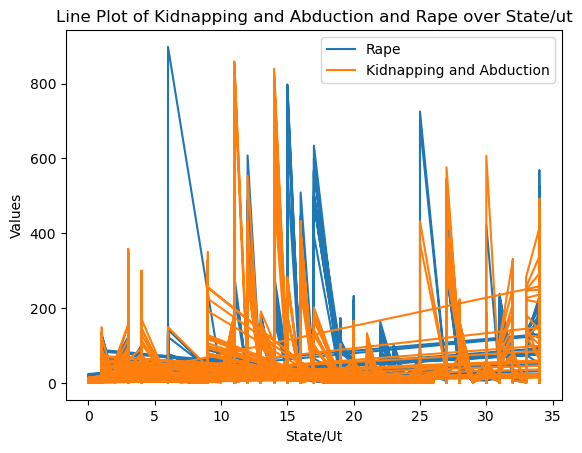

In [41]:
plt.figure(figsize=(8,12))
df_peaceful_area.plot(x='STATE/UT', y=['Rape', 'Kidnapping and Abduction'], kind='line')
plt.xlabel('State/Ut')
plt.ylabel('Values')
plt.title('Line Plot of Kidnapping and Abduction and Rape over State/ut')
plt.show()

# "Moderate Area Data"

In [42]:
df_moderate_area.head(60)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,cluster,cluster_name,STATE/UT_encoded
28,1,753,2001,871,765,420,3544,2271,5791,7,1,Sensitive Area,1
70,3,753,2001,817,1070,59,850,4,1248,0,1,Sensitive Area,3
115,4,753,2001,888,518,859,562,21,1558,83,1,Sensitive Area,4
135,6,753,2001,959,171,70,1763,161,840,0,1,Sensitive Area,6
351,19,753,2001,2851,668,609,7063,751,2562,0,1,Sensitive Area,19
397,20,753,2001,1302,611,308,2823,1120,6090,1,1,Sensitive Area,20
470,25,753,2001,790,434,294,1655,458,1266,0,1,Sensitive Area,25
529,28,753,2001,1049,2165,376,2878,56,5532,1,1,Sensitive Area,28
688,34,753,2001,709,695,265,954,48,3859,3,1,Peaceful Area,34
700,9,191,2001,381,964,113,502,90,138,0,1,Moderate Area,9


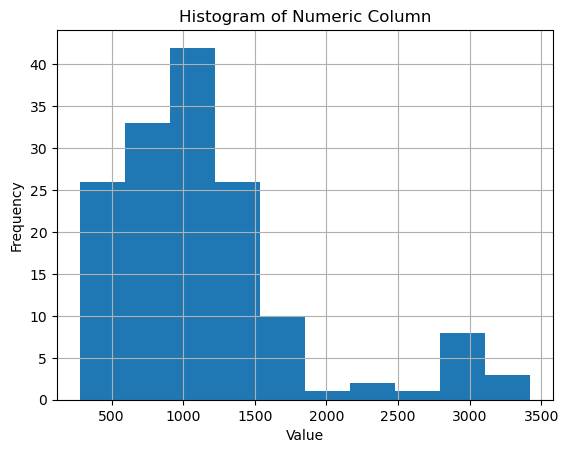

In [43]:
df_moderate_area['Rape'].hist()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Numeric Column')
plt.show()

# "Sensitive Area Data"

In [44]:
df_sensitive_area.head(60)

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,cluster,cluster_name,STATE/UT_encoded
650,32,753,2001,1958,2879,2211,2870,2575,7365,0,2,Sensitive Area,32
5040,32,753,2007,1648,3363,2076,2522,2882,7650,0,2,Sensitive Area,32
5796,32,753,2008,1871,4439,2237,2955,3374,8312,0,2,Sensitive Area,32
6563,32,753,2009,1759,5078,2232,2782,2524,8566,0,2,Sensitive Area,32
6718,3,753,2010,1721,2767,175,1400,20,5410,0,2,Sensitive Area,3
7342,32,753,2010,1563,5468,2217,2793,11,7978,0,2,Sensitive Area,32
7381,34,753,2010,2311,2764,507,2465,163,17796,8,2,Sensitive Area,34
7497,3,753,2011,1700,3192,121,1193,8,5246,2,2,Sensitive Area,3
7542,4,753,2011,934,3050,1413,790,11,2607,10,2,Sensitive Area,4
8004,28,753,2011,1800,2713,514,2447,9,12218,0,2,Sensitive Area,28


<Figure size 800x1200 with 0 Axes>

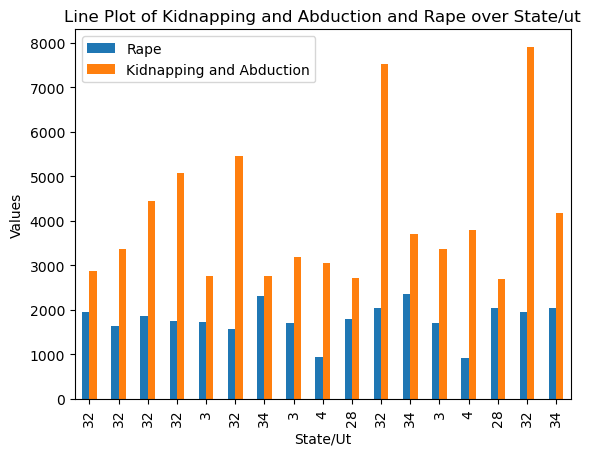

In [45]:
plt.figure(figsize=(8,12))
df_sensitive_area.plot(x='STATE/UT', y=['Rape', 'Kidnapping and Abduction'], kind='bar')
plt.xlabel('State/Ut')
plt.ylabel('Values')
plt.title('Line Plot of Kidnapping and Abduction and Rape over State/ut')
plt.show()

# ---------------------------------------------------------------------------------------- 4.3  "Analyse your clusters and prepare a report that explains all your observations-----------------------------------------------------------------------

# Analysis Report: Crime Against Women in India

## Executive Summary

This report analyzes crimes against women across various regions in India, focusing on rape cases, dowry deaths, and kidnapping and abduction incidents. Regions are categorized into Peaceful, Moderate, and Sensitive areas based on crime rates.

## Findings

### Peaceful Areas

#### Regions Identified
- Andhra Pradesh
- Assam
- Arunachal Pradesh

#### Observations
- Lower rates of rape, dowry deaths, and kidnapping/abduction incidents.
- These regions exhibit relatively safer environments for women.

### Moderate Areas

#### Observations
- Crime rates are moderate, falling between those in Peaceful and Sensitive areas.
- Continued law enforcement efforts are needed to maintain safety.

### Sensitive Areas

#### Regions Identified
- Bihar
- Chhattisgarh
- West Bengal
- Andhra Pradesh

#### Observations
- Higher rates of crimes against women, particularly rape, dowry deaths, and kidnapping/abduction.
- Urgent attention and intervention required to improve safety.

## Recommendations

1. **Enhanced Law Enforcement**: Strengthen law enforcement in sensitive areas.
2. **Public Awareness**: Educate communities about women's rights and crime reporting.
3. **Support Services**: Provide better support for victims.
4. **Policy Interventions**: Implement stricter policies to deter crimes.
5. **Community Policing**: Encourage local community involvement in maintaining safety.

## Conclusion

The analysis highlights regional disparities in crimes against women. Peaceful areas show lower crime rates, while sensitive areas face significant challenges. Comprehensive approaches are needed to ensure women's safety across all regions.


# ----------------------------------------------------------------------------------------- 4.4  Capstone project overall story in your own words. Min 1000 words----------------------------------------------------------------------------------------------

## Understanding Crime Against Women in India: An In-depth Analysis

### Introduction

Crime against women is a critical societal issue in India, influenced by diverse socio-economic, cultural, and legal factors. This report examines the prevalence, patterns, and underlying dynamics of crimes against women across various regions in the country.

### The State of Women's Safety

India's cultural diversity and demographic complexity contribute to varying levels of safety and security for women. Despite progress in various sectors, women continue to face significant challenges such as domestic violence, sexual assault, dowry-related crimes, and trafficking.

### Analyzing the Data

This analysis relies on comprehensive datasets and statistical insights to uncover trends and patterns in crimes against women over time. By dissecting available data, we aim to highlight areas of concern and identify potential avenues for intervention.

### The Three Zones: Peaceful, Moderate, and Sensitive

#### Peaceful Areas

Peaceful areas exhibit lower incidences of crimes against women. These regions typically benefit from higher education levels, economic stability, and robust social support systems, contributing to a safer environment for women.

#### Moderate Areas

Moderate areas experience intermediate levels of crime against women. While incidents may occur sporadically, overall crime rates remain moderate. Socio-economic disparities and cultural attitudes are pivotal factors influencing crime dynamics in these regions.

#### Sensitive Areas

Sensitive areas are characterized by high rates of crime against women. Factors such as poverty, gender inequality, and limited access to education and healthcare amplify risks for women. States like Bihar, Chhattisgarh, West Bengal, and Andhra Pradesh emerge as focal points for urgent intervention and policy reform.

### Challenges and Opportunities

Addressing crime against women demands a multifaceted approach encompassing legislative reforms, enhanced law enforcement, community engagement, and public awareness campaigns. Challenges include entrenched socio-cultural norms and gaps in law enforcement capabilities. However, opportunities exist for collaborative efforts and targeted interventions to effect positive change.

### Conclusion

Crime against women in India is a complex issue requiring coordinated action from government bodies, civil society, and the private sector. By prioritizing women's safety, promoting gender equality, and implementing evidence-based strategies, India can move towards creating safer communities where every woman can live free from violence and discrimination.

### Recommendations

1. **Legislative Reforms**: Strengthen laws to provide better protection for women.
2. **Law Enforcement**: Enhance capacity and responsiveness of law enforcement agencies.
3. **Education and Awareness**: Promote gender sensitization and awareness programs.
4. **Support Services**: Expand access to healthcare, legal aid, and rehabilitation services for victims.
5. **Community Engagement**: Foster community involvement in preventing and addressing crimes against women.

Together, these efforts can pave the way for a safer and more inclusive society for women in India.
